In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils

In [88]:
df = pd.read_csv("../01_data/mortality.csv")
df.head()

,City,Mortality,JanTemp,JulyTemp,RelHum,Rain,Educ,Dens,NonWhite,WhiteCollar,Pop,House,Income,HC,NOx,SO2
0,"Akron, OH",921.87,27,71,59,36,11.4,3243,8.8,42.6,660328,3.34,29560,21,15,59
1,"Albany-Schenectady-Troy, NY",997.87,23,72,57,35,11.0,4281,3.5,50.7,835880,3.14,31458,8,10,39
2,"Allentown, Bethlehem,PA-NJ",962.35,29,74,54,44,9.8,4260,0.8,39.4,635481,3.21,31856,6,6,33
3,"Atlanta, GA",982.29,45,79,56,47,11.1,3125,27.1,50.2,2138231,3.41,32452,18,8,24
4,"Baltimore, MD",1071.29,35,77,55,43,9.6,6441,24.4,43.7,2199531,3.44,32368,43,38,206


<AxesSubplot:>

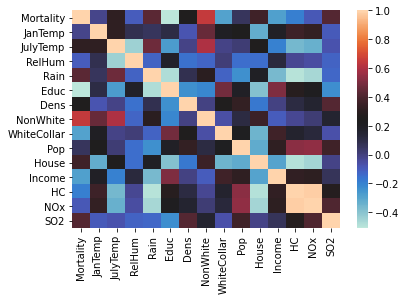

In [89]:
sns.heatmap(df.corr(), cmap="icefire")

In [90]:
df_np = df.to_numpy()
y = df_np[:,1]
X = np.concatenate((np.ones((len(y), 1)), df_np[:,2:16]),axis=1)
X.shape

(59, 15)

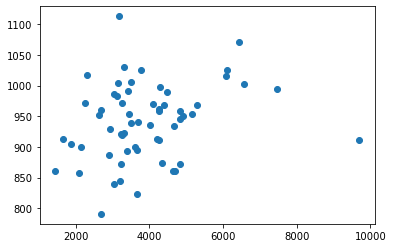

In [91]:
plt.scatter(x=X[:,6], y=y)

In [92]:
alphas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
# without scaling of the variables
for alpha in alphas:
    print("alpha = {}: {}, {}" .format(alpha, utils.gradient_descent(X, y, alpha)[0], utils.gradient_descent(X, y, alpha)[1]))

alpha = 0.1: [-inf -inf -inf -inf -inf -inf nan -inf -inf nan -inf nan -inf -inf -inf], 24
alpha = 0.01: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], 26
alpha = 0.001: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], 28
alpha = 0.0001: [-inf -inf -inf -inf -inf -inf -inf -inf -inf nan -inf nan -inf -inf -inf], 30
alpha = 1e-05: [inf inf inf inf inf inf nan inf inf nan inf nan inf inf inf], 33


C:\Users\Simon\projects\dataScience\MITx_Data_Analysis\Homework_01\02_code\utils.py:23: RuntimeWarning: invalid value encountered in add
  betas_new = betas_new + 2* step_size * (y - prediction).T.dot(X)


In [93]:
y_normal = np.zeros_like(y)
for i in range(y.shape[0]):
    y_normal[i] = (y[i] - np.std(y))/np.mean(y)
X_normal = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X_normal[i,j] = (X[i,j] - np.std(X[:,j]))/np.mean(X[:,j])

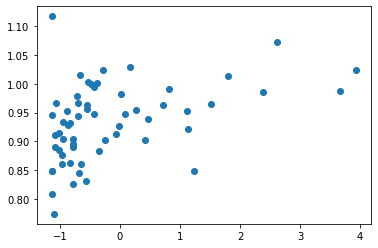

In [136]:
plt.scatter(x=X_normal[:,14], y=y_normal)

In [95]:
betas = np.linalg.inv(X_normal.T.dot(X_normal)).dot(X_normal.T).dot(y_normal)

TypeError: No loop matching the specified signature and casting was found for ufunc inv

In [158]:
alphas = np.arange(3.5e-7, 3.7e-7, 5e-9)

# alpha = 3.65e-07
#alphas = [0.00001, 0.00005, 0.00008]
for alpha in alphas:
    print("alpha: {}" .format(alpha))
    betas, counter = utils.gradient_descent(X_normal, y_normal, alpha)
    for beta in betas:
        print("{:.2}" .format(beta))
    print("counter: {}..." .format(counter))

alpha: 3.5e-07
0.12
0.085
0.11
0.11
0.077
0.11
0.077
0.031
0.11
0.01
0.12
0.11
-0.02
0.0079
0.017
counter: 25331...
alpha: 3.55e-07
0.12
0.085
0.11
0.11
0.077
0.11
0.077
0.031
0.11
0.0099
0.12
0.11
-0.02
0.008
0.017
counter: 25305...
alpha: 3.6e-07
0.13
0.085
0.11
0.11
0.078
0.11
0.077
0.031
0.11
0.0096
0.12
0.11
-0.02
0.0081
0.017
counter: 25291...
alpha: 3.65e-07
0.13
0.085
0.12
0.11
0.078
0.11
0.077
0.031
0.11
0.0094
0.12
0.11
-0.02
0.0082
0.017
counter: 25288...
alpha: 3.7e-07
0.13
0.085
0.12
0.11
0.078
0.11
0.077
0.03
0.11
0.0091
0.12
0.11
-0.02
0.0083
0.017
counter: 25296...
